In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
stocks = ['AAPL', 'MSFT', 'NVDA', 'AVGO', 'ORCL', 'ADBE', 'CRM', 'AMD', 'ACN', 'CSCO']
start_date = '2020-01-01'
end_date = '2023-12-31'

data2 = pd.DataFrame()



for stock in stocks:
    data = yf.download(stock, start=start_date, end=end_date)['Close']
    data2 = pd.merge(data2, data.rename(stock), left_index=True, right_index=True, how='outer')

data2.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,NVDA,AVGO,ORCL,ADBE,CRM,AMD,ACN,CSCO
Date,,,,,,,,,,
2020-01-02,75.087502,160.619995,59.977501,322.390015,53.950001,334.429993,166.990005,49.099998,210.149994,48.419998
2020-01-03,74.357498,158.619995,59.017502,314.190002,53.759998,331.809998,166.169998,48.599998,209.800003,47.630001
2020-01-06,74.949997,159.029999,59.264999,313.720001,54.040001,333.709991,173.449997,48.389999,208.429993,47.799999
2020-01-07,74.597504,157.580002,59.982498,312.640015,54.160000,333.390015,176.000000,48.250000,203.929993,47.490002
2020-01-08,75.797501,160.089996,60.095001,308.739990,54.130001,337.869995,177.330002,47.830002,204.330002,47.520000


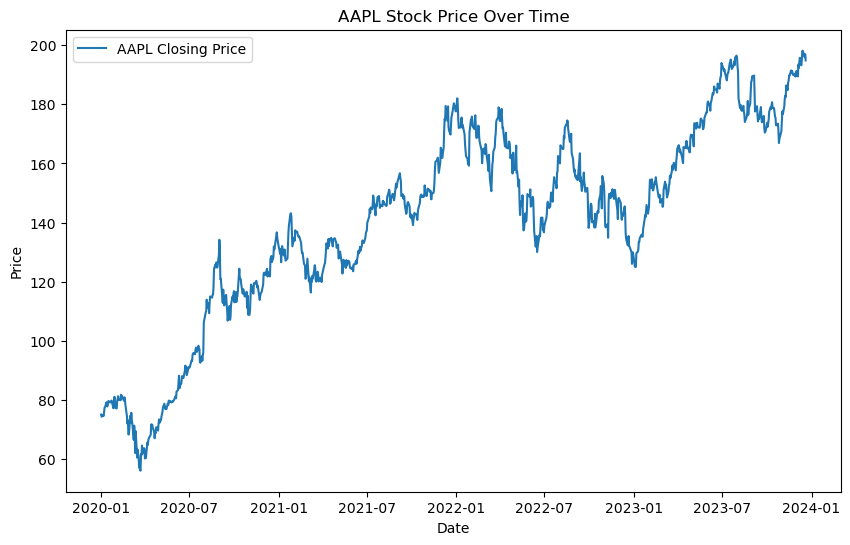

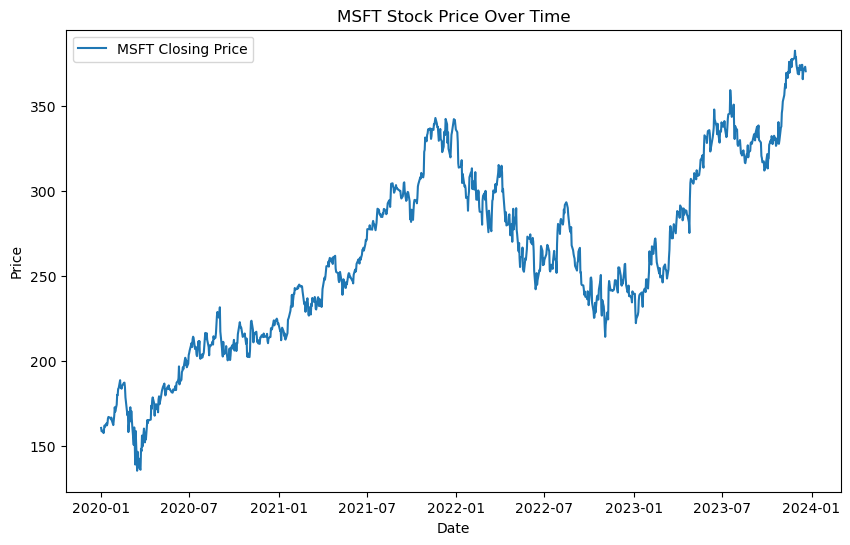

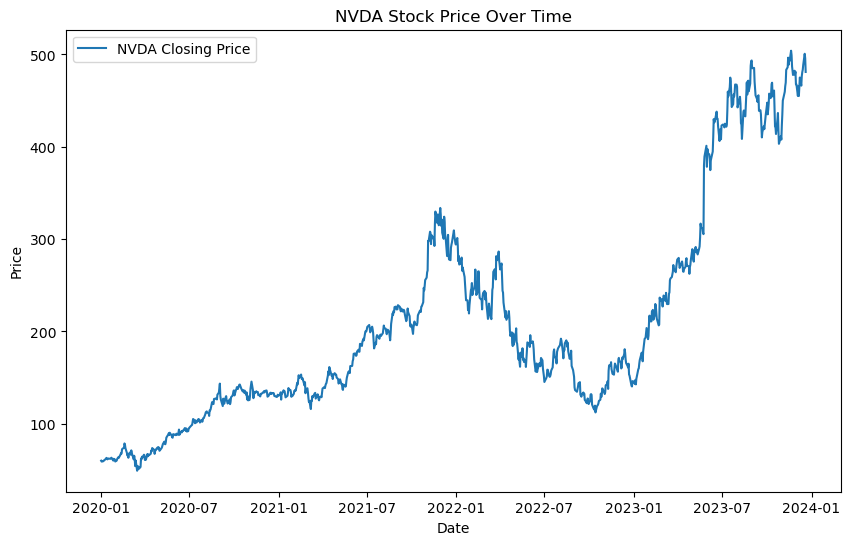

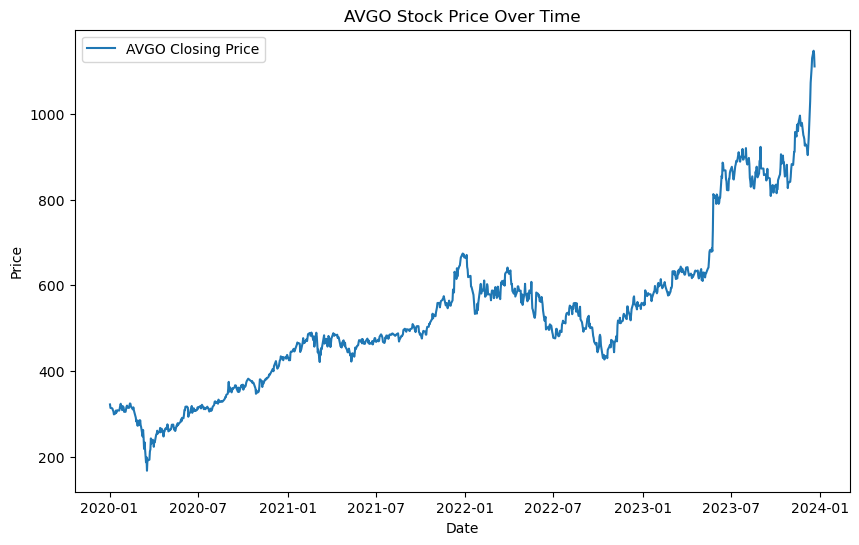

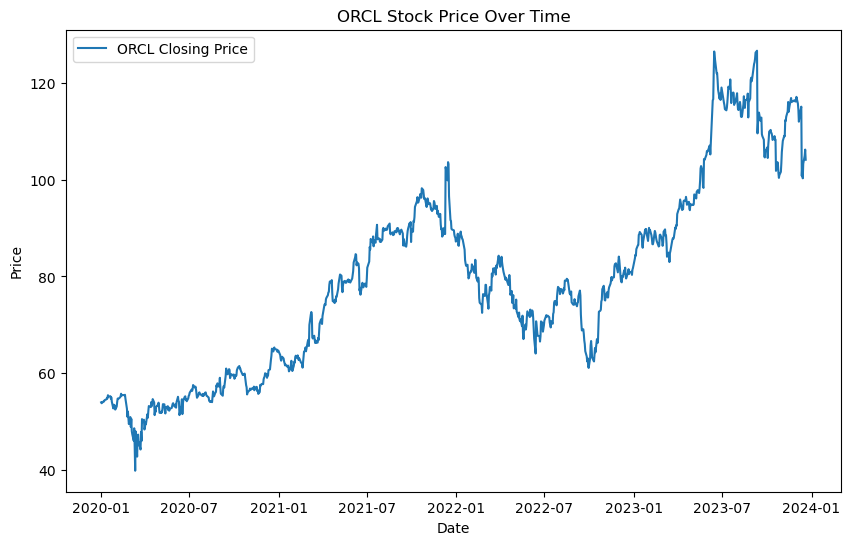

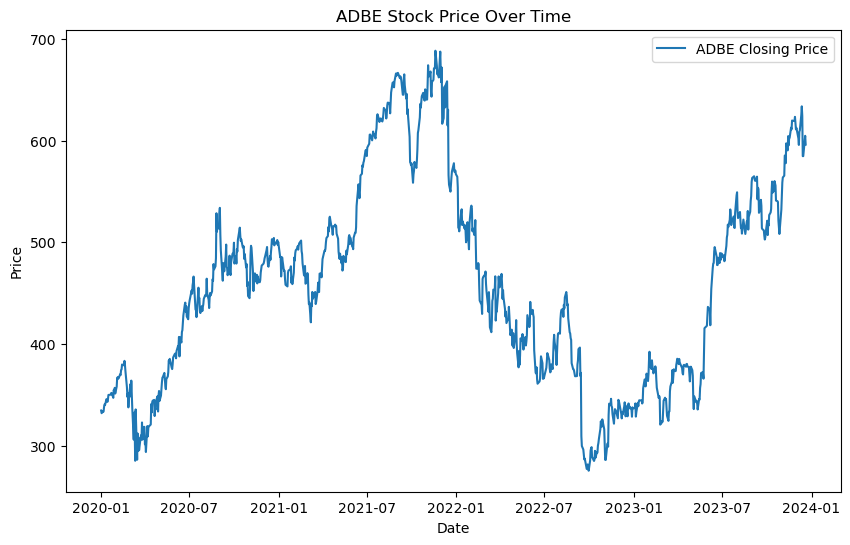

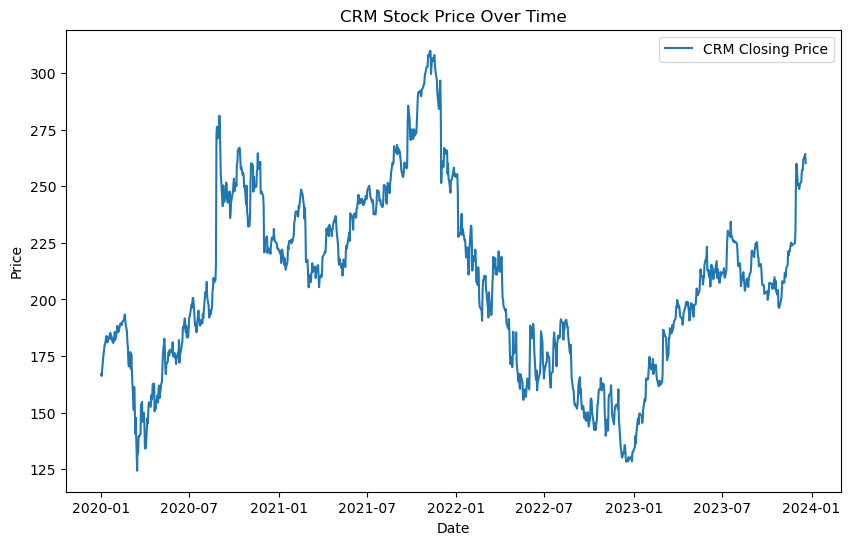

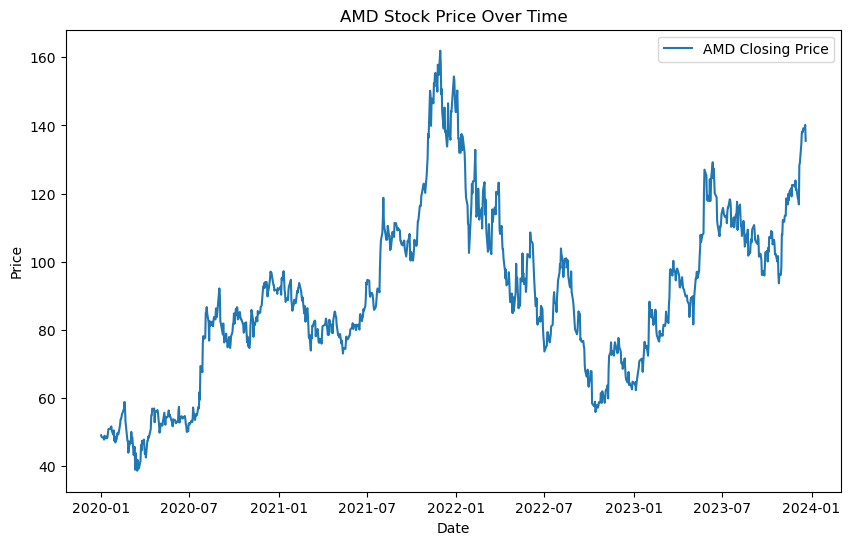

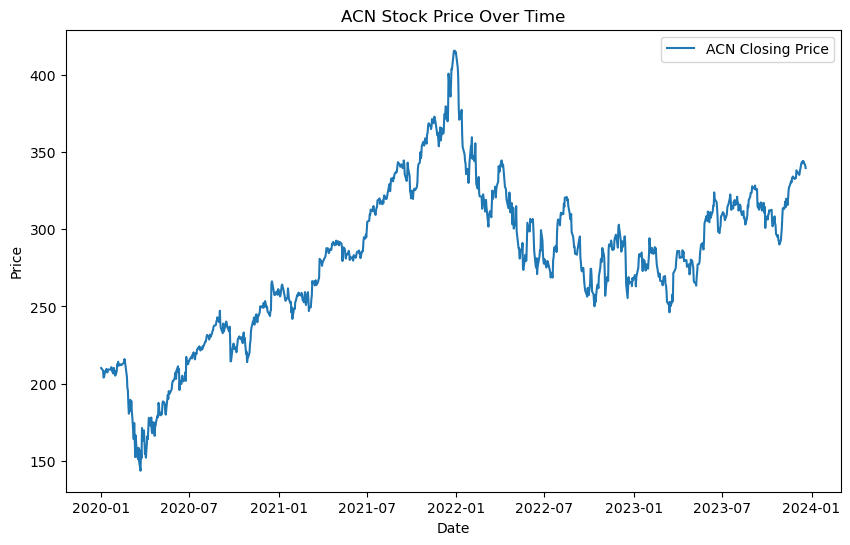

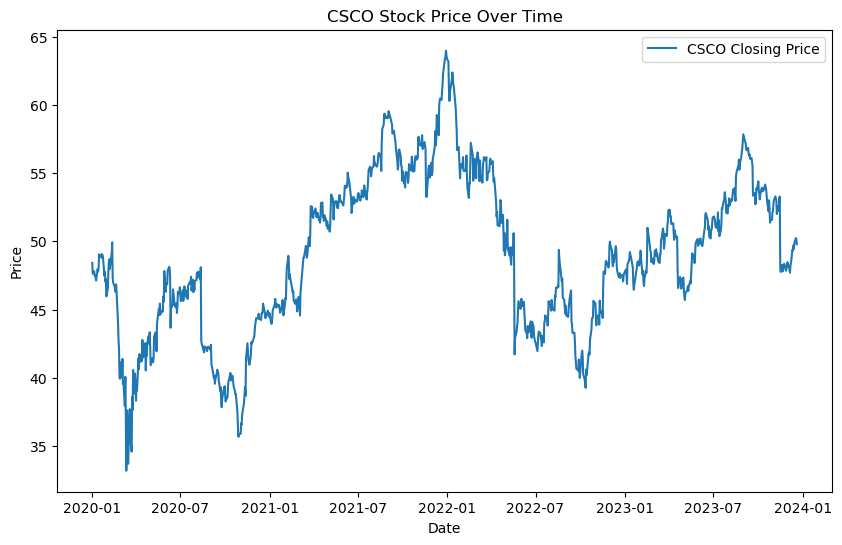

In [5]:
for stock in data2.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data2.index, data2[stock], label=f'{stock} Closing Price')
    plt.title(f'{stock} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [6]:
import json

from datetime import datetime

# Define the list of stocks
stocks = ['AAPL', 'MSFT', 'NVDA', 'AVGO', 'ORCL', 'ADBE', 'CRM', 'AMD', 'ACN', 'CSCO']
end_date = datetime.now().strftime('%Y-%m-%d')  # Today's date in the correct format

# Initialize a dictionary to store the data
stock_data = {}

# Fetch the historical closing price data for each stock from Yahoo Finance
for stock in stocks:
    ticker = yf.Ticker(stock)
    # Get historical data from 01/01/2020 to present
    hist = ticker.history(start="2020-01-01", end=end_date)
    # Store the date and closing prices in the stock_data dictionary
    stock_data[stock] = [{'date': str(date.date()), 'close': float(price)} for date, price in hist['Close'].items()]

# Write the data to a JSON file
with open('stock_data.json', 'w') as outfile:
    json.dump(stock_data, outfile)